## Twitter EDA Summary

### Mental Issues by the hour
* Negative thoughts such as stress, loneliness, depression, suicide tends to occur at night. 

### Sentiment by the hour
* Most mental issues have negative sentiments and they seem to be persistent through all times of the day. However, some words like 'overwhelmed are associated with tweets such as being overwhelmed when seeing their celebrities. Perhaps, the work overwhelmed is analyzed in a contextual manner
* Words like no motivation has an unusually high positive score perhaps due to how VADER outputs sentiment for this word

### Engagement (likes + retweets + comments)
* Interestingly, tweets with a higher amount of engagement are tweets that are very negative in sentiment as seen in depression/suicide. Perhaps more people are engaging the people who tweets very negative material?

### Scattertext - Empath
* Checkout the HTML pushed together with this notebook
* How to use: In the HTML, search for empath topics, once you have done so, below will be tweets relating to a keyword, this way you can see positive/negative topics linked to the keyword you found and its associated sentiment
* Good Link to help understand the use of scattertext: https://towardsdatascience.com/interpreting-scattertext-a-seductive-tool-for-plotting-text-2e94e5824858

## Data set exploration and statistics

In [1]:
import pandas as pd
# !pip install joypy
from joypy import joyplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from IPython.display import IFrame
from IPython.core.display import display, HTML

# Data Pre-processing

In [2]:
df = pd.read_csv('../../../data/twitter/final/final-clean-sentiment_class.csv')
df = df.drop('Unnamed: 0',axis=1)
df['hour'] = pd.DatetimeIndex(df['date']).hour
df['day'] = pd.DatetimeIndex(df['date']).day

# Removing irrelevent tweets via keywords and removal of stopwords
# Remove rows with these stopwords
search_words = ['nikerunning', 'dec', 'delavin',
                'kisses', 'agrunningmoms', 'migraineinsg',
                'jordan', 'munchausen', 'concert',
                'wspd', 'comedy', 'gentlemonstersunglasses', 
                'gentlemonster', 'youtube', 'star', 'place', 
                'comedy', 'poetry', 'want', 'know', 'diagrams', 
                'pared', 'owls', 'riser', 'street', 'style', 'buat',
                'phd', 'hi', 'im', 'gold', 'standard', 'yeah', 'watch', 
                'arena', 'things', 'teka', 'gt', 'matter', 'forex', 
                'zentrader', 'hospital', 'zerowaste', 'foodwaste', 
                'kangdaniel', 'danielk']

df = df[~df['clean_tweet4'].str.contains('|'.join(search_words), na=False)] #ignore NaN else the code breaks

In [3]:
from wordcloud import WordCloud, STOPWORDS
my_stopwords = ['gt', 'day', 'majlis', 'via', 'seems', 'app', 'know', 'means',
                'days', 'take', 'things', 'months', 'viayoutube ', 'best', 'chat', 'ing'
               'gets', 'info', 'super', 'daily', 'word', 'try', 'gets', 'pm', 'zero',
               'sum', 'app', 'enough', 'need', 'rate', 'chats']

df['clean_tweet4'] = df['clean_tweet4'].fillna('') 

df['clean_tweet4'] = df['clean_tweet4'].str.split(' ').apply(lambda x: ' '.join(word for word in x if word not in my_stopwords))

In [4]:
# Select some keywords related to mental health
mental_illness = ['depression', 
                  'mental illness',
                  'stress',
                  'lonely',
                  'suicide',
                  'no motivation',
                  'overwhelmed',
                  'bipolar']

df_mental_illness = df[df['search'].str.contains('|'.join(mental_illness))]

In [5]:
df.reset_index(drop=True,inplace=True)

In [6]:
df.head()

,date,hashtags,username,nlikes,nreplies,nretweets,search,clean_tweet4,year,month,check,sentiment,sentiment_class,hour,day
0,12/29/2019 12:47,[],Aluvrendar,67,3,6,depression,hope blessings depression never return anxiety...,2019,12,mh,0.6149,Very Positive,12,29
1,12/26/2019 2:16,[],NASYRANN_,0,1,3,depression,depression thought,2019,12,mh,-0.5719,Very Negative,2,26
2,12/20/2019 12:13,[],DEPRESSIONcomsg,0,0,0,depression,rapper acid depression blazer,2019,12,mh,-0.5719,Very Negative,12,20
3,12/15/2019 11:11,[],DEPRESSIONcomsg,0,0,0,depression,depression display orchard gateway mall,2019,12,mh,-0.5719,Very Negative,11,15
4,11/25/2019 20:52,[],enzoticaaa,1,0,0,depression,partially true debt cause depression,2019,11,mh,-0.5267,Negative,20,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32286,2/3/2021 13:02,[],disha,7,0,0,frontline,twitter post bowl tweet confetti include thank...,2021,2,pd,0.7506,Very Positive,13,3
32287,1/28/2021 15:21,[],DroChavez,0,2,0,frontline,singapore may pre register interest vaccinatio...,2021,1,pd,0.4588,Positve,15,28
32288,1/28/2021 7:44,[],russelwongphoto,0,0,0,frontline,stpi honours frontline healthcare social worke...,2021,1,pd,0.7184,Very Positive,7,28
32289,1/26/2021 15:02,[],ShaheerBirdieFC,7,1,0,frontline,covid care speech drove us frontline warriors ...,2021,1,pd,0.9735,Very Positive,15,26


### Mental Issues by the hour

In [7]:
df_illness_by_hour = df_mental_illness.groupby(['search', 'hour'])['search'].size().reset_index(name='count')
df_illness_by_hour = pd.pivot_table(df_illness_by_hour, index='hour', columns='search', values = 'count')
df_illness_by_hour = df_illness_by_hour.fillna(0)

for i in df_illness_by_hour.columns:
    df_illness_by_hour[i] = (df_illness_by_hour[i] - np.min(df_illness_by_hour[i])) / (np.max(df_illness_by_hour[i]) - np.min(df_illness_by_hour[i]))

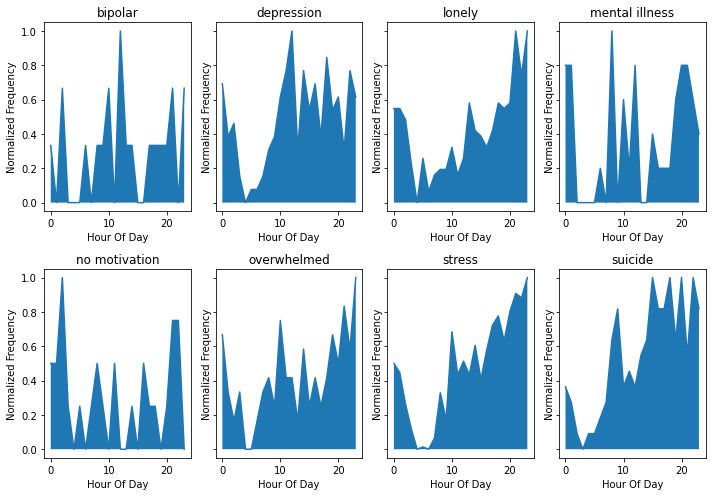

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(10,7), sharey=True)
ax = ax.ravel()

for idx, cols in enumerate(df_illness_by_hour.columns):
    ax[idx].plot(df_illness_by_hour[cols])
    ax[idx].fill_between(x=df_illness_by_hour.index,y1=df_illness_by_hour[cols])
    ax[idx].set_xlabel('Hour Of Day')
    ax[idx].set_ylabel('Normalized Frequency')
    ax[idx].set_title(cols)
plt.tight_layout()
    
    

In [9]:
df_mental_illness.head(1)

,date,hashtags,username,nlikes,nreplies,nretweets,search,clean_tweet4,year,month,check,sentiment,sentiment_class,hour,day
1,12/29/2019 12:47,[],Aluvrendar,67,3,6,depression,hope blessings depression never return anxiety...,2019,12,mh,0.6149,Very Positive,12,29


In [10]:
df_sentiment_by_hour = df_mental_illness.groupby(['search', 'hour'])['sentiment'].mean().reset_index(name='count')
df_sentiment_by_hour = pd.pivot_table(df_sentiment_by_hour, index='hour', columns='search', values = 'count')
df_sentiment_by_hour = df_sentiment_by_hour.fillna(0)

# for i in df_sentiment_by_hour.columns:
#     df_sentiment_by_hour[i] = (df_sentiment_by_hour[i] - np.min(df_sentiment_by_hour[i])) / (np.max(df_illness_by_hour[i]) - np.min(df_sentiment_by_hour[i]))

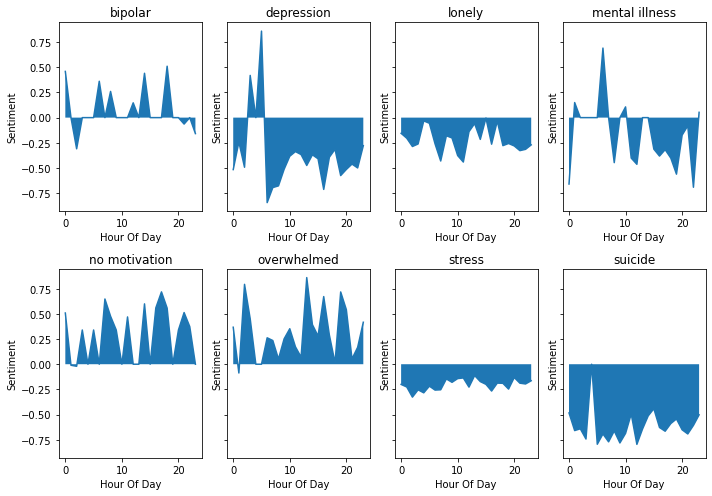

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(10,7), sharey=True)
ax = ax.ravel()

for idx, cols in enumerate(df_sentiment_by_hour.columns):
    ax[idx].plot(df_sentiment_by_hour[cols])
    ax[idx].fill_between(x=df_sentiment_by_hour.index,y1=df_sentiment_by_hour[cols])
    ax[idx].set_xlabel('Hour Of Day')
    ax[idx].set_ylabel('Sentiment')
    ax[idx].set_title(cols)
plt.tight_layout()
    
# Observe that overwhelmed had a positive sentiment, we investigate further below
    

In [12]:
# Note that some tweets regarding overwhelmed are not related to the feeling of too much work load 
# or negative emtions typically associated with it. Instead, it contains tweets relating to idol support
# etc
df[(df['sentiment']>=0) & (df['search']=='overwhelmed')].head(5)

,date,hashtags,username,nlikes,nreplies,nretweets,search,clean_tweet4,year,month,check,sentiment,sentiment_class,hour,day
5127,12/29/2019 16:01,"['backpacker', 'subwaystation', 'orchardroadsi...",thejazzcyclist,2,0,0,overwhelmed,year old backpacker many moons ago local subwa...,2019,12,mh,0.8000,Very Positive,16,29
5128,12/1/2019 10:34,['glorytogod'],AzureCasey,1,0,0,overwhelmed,heart overwhelmed gratitude glorytogod marina ...,2019,12,mh,0.5423,Positve,10,1
5129,11/22/2019 19:57,[],qheizaedelwise,0,0,0,overwhelmed,reposted nationalcancercentresg get regrann th...,2019,11,mh,0.5423,Positve,19,22
5131,11/21/2019 10:43,"['san', '???']",NFchoo,0,0,0,overwhelmed,overwhelmed fascinatingateezofficial san,2019,11,mh,0.0516,Neutral,10,21
5132,11/20/2019 8:09,[],_Angie_62,1,0,0,overwhelmed,looked overwhelmed guess expecting huge huge c...,2019,11,mh,0.5859,Positve,8,20


In [13]:
# an example of an positively overwhelmed keyword related tweet
df.iloc[5128,7]

'heart overwhelmed gratitude glorytogod marina bay singapore'

In [14]:
# Note that some tweets regarding overwhelmed are not related to the feeling of too much work load 
# or negative emtions typically associated with it. Instead, it contains tweets relating to idol support
# etc
df[(df['sentiment']>=0) & (df['search']=='no motivation')].head(5)

,date,hashtags,username,nlikes,nreplies,nretweets,search,clean_tweet4,year,month,check,sentiment,sentiment_class,hour,day
1208,10/30/2019 11:59,[],ganhuyag,0,0,0,no motivation,like believe political motivation,2019,10,mh,0.5994,Positve,11,30
1209,10/20/2019 22:10,[],svlpreme,0,0,0,no motivation,okay motivation sign next pay,2019,10,mh,0.4404,Positve,22,20
1210,10/14/2019 22:36,[],revati_rajoo,1,0,0,no motivation,motivation work,2019,10,mh,0.3400,Positve,22,14
1211,10/3/2019 9:44,[],AdammaOsman,0,0,0,no motivation,wages motivation mood work,2019,10,mh,0.3400,Positve,9,3
1212,9/6/2019 20:27,[],khimarhawari,0,1,0,no motivation,literally got motivation live,2019,9,mh,0.3400,Positve,20,6


### Engagement 

In [15]:
df_mental_illness['engagement'] = df_mental_illness['nlikes'] + df_mental_illness['nreplies'] + df_mental_illness['nretweets']
df_engagement = df_mental_illness.groupby(['search','sentiment_class'])['engagement'].sum().reset_index(name='engagement')

/Users/jeromeyue/Desktop/omdena/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [16]:
df_engagement.head(10)

,search,sentiment_class,engagement
0,bipolar,Negative,2
1,bipolar,Neutral,17
2,bipolar,Positve,4
3,bipolar,Very Negative,1
4,depression,Negative,39
5,depression,Neutral,8
6,depression,Positve,55
7,depression,Very Negative,191
8,depression,Very Positive,81
9,lonely,Negative,1152


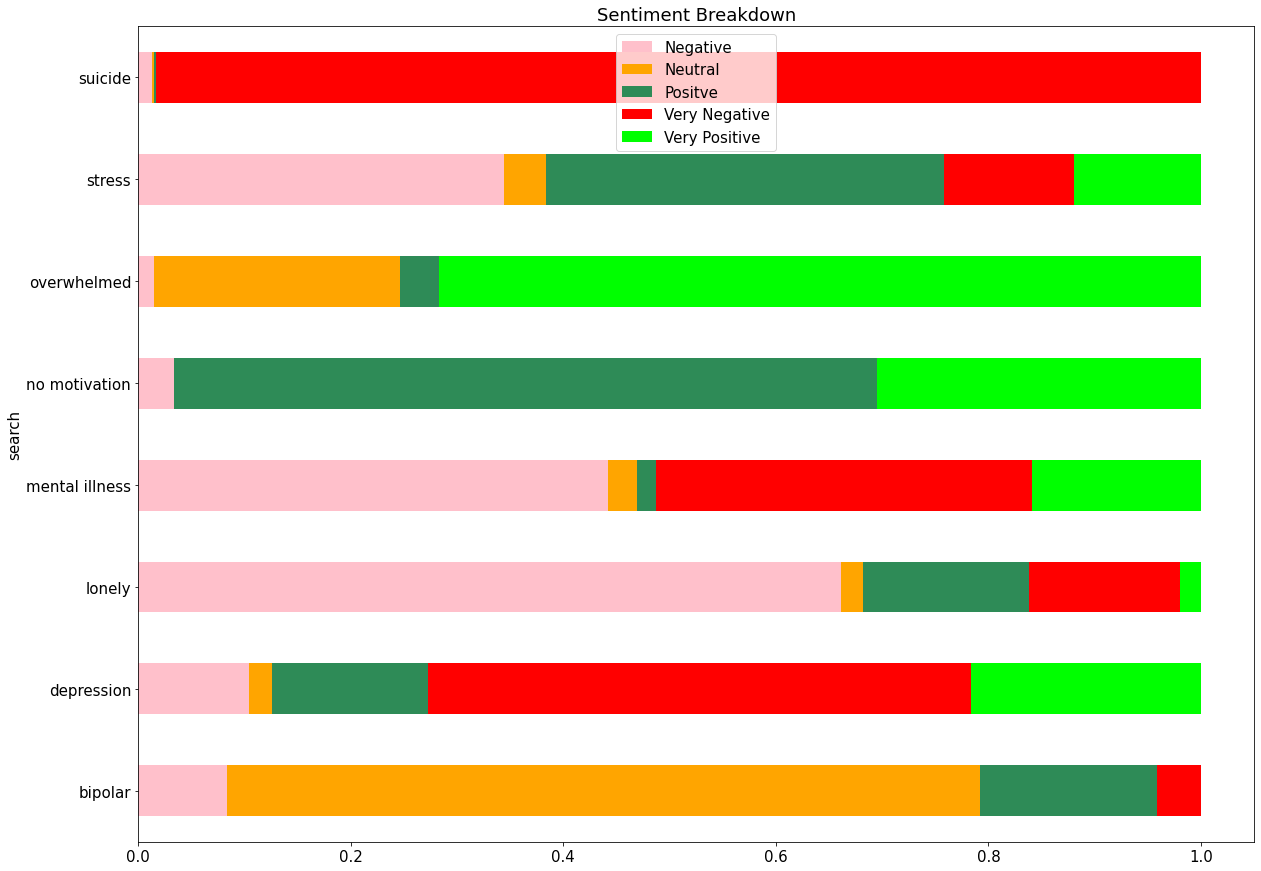

In [17]:
df_engagement = pd.pivot_table(df_engagement, 
                               values='engagement', 
                               index='search', 
                               columns='sentiment_class',
                               aggfunc='sum',
                               fill_value=0)

df_engagement = df_engagement.div(df_engagement.sum(axis=1), axis=0)
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(20,15))
df_engagement.plot( kind = 'barh', 
                   stacked = True, 
                   title = 'Sentiment Breakdown',
                   ax=ax, 
                   color=['pink','orange','seagreen','red','lime'])
ax.legend(loc='upper center')


# ScatterText - Empath

In [18]:
import spacy
import scattertext as st
# !python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')
import empath

In [19]:
df_scattertext = df.copy()
df_scattertext['sentiment_class'] = df_scattertext['sentiment_class'].str.replace('Very Positive', 'Positive')
df_scattertext['sentiment_class'] = df_scattertext['sentiment_class'].str.replace('Positve', 'Positive')
df_scattertext['sentiment_class'] = df_scattertext['sentiment_class'].str.replace('Very Negative', 'Negative')
df_scattertext_no_neutral = df_scattertext[df_scattertext['sentiment_class']!='Neutral']

<AxesSubplot:>

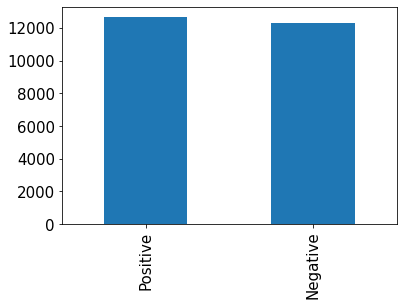

In [20]:
df_scattertext_no_neutral['sentiment_class'].value_counts().plot(kind='bar')

In [23]:
# Takes some time to load
feat_builder = st.FeatsFromOnlyEmpath()
empath_corpus = st.CorpusFromParsedDocuments(df_scattertext_no_neutral,
                                             category_col='sentiment_class',
                                             feats_from_spacy_doc=feat_builder,
                                             parsed_col='clean_tweet4').build()


In [24]:
html = st.produce_scattertext_explorer(empath_corpus,
                                       category='Positive',
                                       category_name='Positive',
                                       not_category_name='Negative',
                                       width_in_pixels=1000,
                                       metadata=df_scattertext_no_neutral['search'],
                                       use_non_text_features=True,
                                       use_full_doc=True,
                                       topic_model_term_lists=feat_builder.get_top_model_term_lists())

open('Convention-Visualization-Empath.html', 'wb').write(html.encode('utf-8'))
# print('Open ./Convention-Visualization-Empath.html in Chrome or Firefox.')

6197500

In [25]:
# Opening the HTML makes it easier to navigate
IFrame(src='Convention-Visualization-Empath.html', width = 1300, height=700)